# The Sparks Foundation
# Task-2 :To Explore Supervised Machine Learning
                      
##                                                       Author - Mutiur Rehman Khan

## Importing all the required libraries

In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Reading data from remote link

In [8]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
print("Showing the first 10 lines ")
data.head(10).style.background_gradient(cmap='summer_r')

Data imported successfully
Showing the first 10 lines 


,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


## Exploring the dataframe

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
data.describe().style.background_gradient(cmap='summer_r')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\shan pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

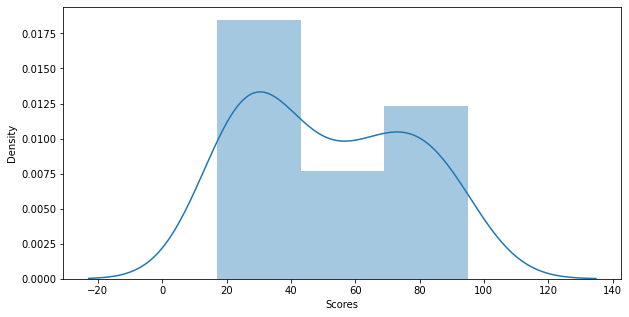

In [16]:
#Plotting Distribution of Scores
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(data['Scores']) 

<AxesSubplot:>

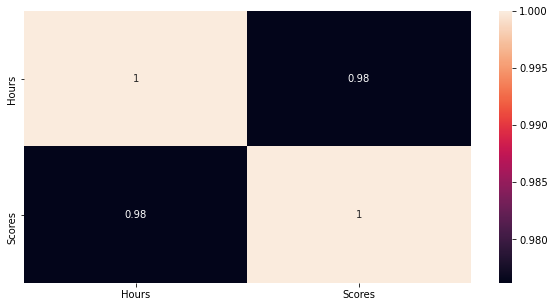

In [17]:
sns.heatmap(data.corr(), annot=True)

## Plotting distribution of scores

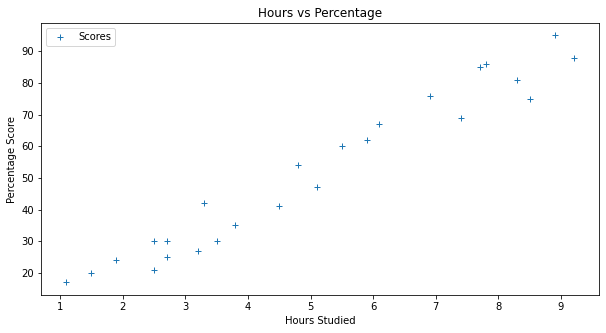

In [20]:
data.plot(x='Hours', y='Scores',style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the Data

#### Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [21]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

 #### Splitting the data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the model
#### Algorithm: Linear Regression
Simple Linear Regression Algorithm is used as the dataset contains only two columns

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


 #### Plotting the regression line

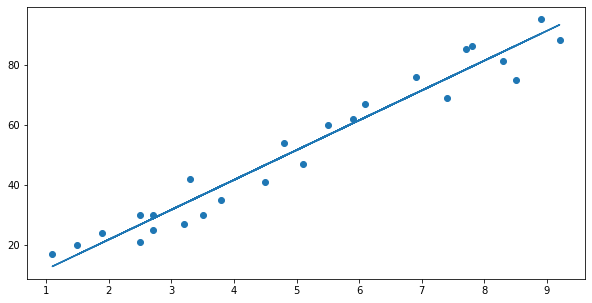

In [24]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Testing the algorithm

In [25]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).style.background_gradient(cmap='summer_r')  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###  Evaluating the performance of the model
This step is particularly important to compare how well different algorithms perform on a particular dataset. Here, I have chosen the mean square error.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


### Predicting Score for 9.25 hours

In [28]:
# You can also test with your own data
hours = np.array([9.25])
hours=hours.reshape(-1, 1)

own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
